<a href="https://colab.research.google.com/github/mitesh98/StackOverflow-Tag-Prediction/blob/master/StackOverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StackOverflow : Tag Prediction

# 1. Buisness Problem

# 1.1 Description

**Description**

Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.

Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

**Problem Statemtent**

Suggest the tags based on the content that was there in the question posted on Stackoverflow.

**Source:** https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/

# 1.2 Source / useful links
Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 

Youtube : https://youtu.be/nNDqbUhtIRg 

Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf 

Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

# 1.3 Real World / Business Objectives and Constraints






1. Predict as many tags as possible with high precision and recall.

2. Incorrect tags could impact customer experience on StackOverflow.

3. No strict latency constraints.

# 2. Machine Learning problem

# 2.1 Data
**2.1.1 Data Overview**

Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 
All of the data is in 2 files: Train and Test.

Train.csv contains 4 columns: Id,Title,Body,Tags.

Test.csv contains the same columns but without the Tags, which you are to predict.

Size of Train.csv - 6.75GB

Size of Test.csv - 2GB

Number of rows in Train.csv = 6034195

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).


**Note :-** Due to my PC constraints having 4 GB of RAM only i randomly sampled 100k rows from Train.csv and saved as Train_data.csv and i will be using the same.

**Data Field Explaination**

Dataset contains 100k rows. The columns in the table are:

Id - Unique identifier for each question

Title - The question's title

Body - The body of the question

Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')



# 2.2 Mapping the real-world problem to a Machine Learning Problem

# 2.2.1 Type of Machine Learning Problem

It is a multi-label classification problem 
Multi-label Classification: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. 
Credit: http://scikit-learn.org/stable/modules/multiclass.html


**2.2.2 Performance metric**

**Micro-Averaged F1-Score (Mean F Score) :**   The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 (precision recall) / (precision + recall)

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. 

**'Micro f1 score': **

Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance. 

**'Macro f1 score': **

Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account. 

https://www.kaggle.com/wiki/MeanFScore 
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

**Hamming loss :**  The Hamming loss is the fraction of labels that are incorrectly predicted. 
https://www.kaggle.com/wiki/HammingLoss 

# 3. Exploratory Data Analysis

# 3.1 Data Loading 



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/StackOverflow/Train_data.csv" "Train_data.csv"

In [0]:
import pandas as pd

In [0]:
data=pd.read_csv("Train_data.csv")

In [5]:
data.head()

,Unnamed: 0,Id,Title,Body,Tags
0,2221128,2221129,Linearization for differential equation,<p>I'm trying to make linearization for the fo...,differential-equations
1,1757257,1757258,Java upload file (image specifically) from a J...,<p>I am going mad trying to find an example of...,java asp.net-mvc file-upload applet jnlp
2,1497316,1497317,how to set separate css to each menu item in t...,<p>i have a menu control like below</p>\n\n<p>...,c# asp.net
3,3055821,3055822,jQuery multiple event handler,<p>What does the keyup() at the end of it mean...,jquery
4,4281363,4281364,Applications for using couchDB and a RDBMS tog...,<p>Wondering if there was a scenario where one...,database architecture couchdb rdbms


****3.1.1 Using Pandas with SQLite to Load the data****

In [6]:
!pip install scikit-multilearn

    100% |████████████████████████████████| 92kB 4.2MB/s 


In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
import sqlalchemy
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

In [8]:
#Creating db file from csv
if not os.path.isfile('Train_data.db'):
  engine= sqlalchemy.create_engine('sqlite:///Train_data.db')
  start=datetime.now()
  Csize=10000
  j=0
  index_start=1
  for df in pd.read_csv('Train_data.csv',names=['Id','Title','Body','Tags'], chunksize = Csize,iterator=True,encoding='utf-8'):
    df.index+=index_start
    j+=1
    print('{} rows'.format(j*Csize))
    df.to_sql('data',engine,if_exists='append')
    index_start=df.index[-1]+1
    print("Time taken :" ,datetime.now() - start)
  


10000 rows
Time taken : 0:00:01.116425
20000 rows
Time taken : 0:00:02.036148
30000 rows
Time taken : 0:00:02.952920
40000 rows
Time taken : 0:00:03.884686
50000 rows
Time taken : 0:00:04.821481
60000 rows
Time taken : 0:00:05.877371
70000 rows
Time taken : 0:00:06.815329
80000 rows
Time taken : 0:00:07.702836
90000 rows
Time taken : 0:00:08.590774
100000 rows
Time taken : 0:00:09.482466
110000 rows
Time taken : 0:00:09.500515


**3.1.2 Counting the number of rows**

In [9]:
if os.path.isfile('Train_data.db'):
  con=sqlite3.connect('Train_data.db')
  n_rows=pd.read_sql(""" SELECT count(*) FROM `data`""",con)
  print("No of rows : ",n_rows['count(*)'].values[0])
  con.close()

No of rows :  100001


**3.1.3 Checking for duplicates**

In [0]:
con=sqlite3.connect('Train_data.db')
query="SELECT `Title`,`Tags`,`Body`, COUNT(*) as cnt_dup FROM `data` GROUP BY `Title`,`Body`,`Tags`"
dataframe=pd.read_sql(query,con)
con.close()


In [11]:
n_row=n_rows['count(*)'].values[0]
n_row_dup=dataframe.shape[0]
n_dup=n_row-n_row_dup
print(n_row)
print(n_row_dup)
print("No of Duplicates= ",n_dup)
print("% duplication = ",(n_dup/n_row)*100)

100001
99462
No of Duplicates=  539
% duplication =  0.5389946100538995


In [12]:
dataframe.cnt_dup.value_counts()

1    98923
2      539
Name: cnt_dup, dtype: int64

**Observation :** 

1.No of question one time= 98923

2.No of question two time= 539

In [13]:
#Adding tag_count in dataframe
dataframe['tag_count']=dataframe['Tags'].apply(lambda text : len(text.split(" ")))
dataframe.head()

,Title,Tags,Body,cnt_dup,tag_count
0,Advise on tackling syntax errors in Java,java,"<p>I very inexperience with Java, I'm spending...",1,1
1,Controlling the Lego WeDo Device,c# api lego,<p>Has anyone written a API for the Lego WeDo ...,1,3
2,Count inverse document frequency (idf) in eve...,php,"<p>I wanna count idf, the formula is <code>IDF...",1,1
3,"FrameView with ""flip"" animation images not sc...",android image layout resize scaling,<p>Can't seem to work out what I've got wrong....,1,5
4,Going from Java to Classic ASP / VB,vb6 career-development legacy-code,"<p>Right now, I work on a small team at a larg...",1,3


In [14]:
dataframe['tag_count'].value_counts()

3    28412
2    26520
4    19206
1    13682
5    11642
Name: tag_count, dtype: int64

**Observation :**

1.No of questios having 3 tags =28412

2.No of questios having 2 tags =26520

3.No of questios having 4 tags =19206

4.No of questios having 1 tags =13682

5.No of questios having 5 tags =11642

Order a/c to no of question :

3tags>2 tags > 4 tags >1 tag >5 tags


In [0]:
#Creatibng a new database with no duplicates
if not  os.path.isfile('database_final.db'):
  engine = create_engine("sqlite:///database_final.db")
  data_final = pd.DataFrame(dataframe,columns=['Title','Body','Tags'])
  data_final.to_sql('DTable',engine)

In [16]:
data_final.shape


(99462, 3)

In [0]:
con=sqlite3.connect('database_final.db')
query="SELECT Tags FROM Dtable "
tags=pd.read_sql(query,con)
con.close()

In [18]:
tags.head()

,Tags
0,java
1,c# api lego
2,php
3,android image layout resize scaling
4,vb6 career-development legacy-code


In [19]:
tags.Tags[0]

'java'

# 3.2 Analysis of Tags

**3.2.1 Total number of unique tags**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
vectorizer=CountVectorizer(tokenizer= lambda x: x.split() )
#by default 'split()' will tokenize each tag using space.

tag_train_bows=vectorizer.fit_transform(tags['Tags'])

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.

In [22]:
print("Number of data points :", tag_train_bows.shape[0])
print("Number of unique tag :", tag_train_bows.shape[1])

Number of data points : 99462
Number of unique tag : 18364


In [23]:
#Some features
features=vectorizer.get_feature_names()
print("Some Features are ")
for i in range(1,20):
  print(features[i])

Some Features are 
.bash-profile
.each
.emf
.exe
.htaccess
.htpasswd
.lib
.mov
.net
.net-1.1
.net-2.0
.net-3.5
.net-4.0
.net-4.5
.net-assembly
.net-cf-3.5
.net-client-profile
.net-framework
.net-micro-framework


**3.2.3 Number of times a tag appeared**

In [0]:
import csv

In [0]:
freqs = tag_train_bows.sum(axis=0).A1
#matrix.A1 Return self as a flattened ndarray.

result = dict(zip(features, freqs))

In [0]:
#Saving this dictionary to csv files.
#if not os.path.isfile('tag_counts_dict.csv'):
with open ('tag_counts_dict.csv','w') as csv_file:
  writer = csv.writer(csv_file)
  for key,value in result.items():
   # print(key)
    writer.writerow([key,value])  

In [27]:
tag_df=pd.read_csv("tag_counts_dict.csv",names=['Tags','Counts'])
tag_df.head(10)

,Tags,Counts
0,.app,1
1,.bash-profile,5
2,.each,2
3,.emf,3
4,.exe,1
5,.htaccess,336
6,.htpasswd,2
7,.lib,1
8,.mov,1
9,.net,2676


In [28]:
tag_df_sorted=tag_df.sort_values(['Counts'],ascending=False)
tag_counts=tag_df_sorted['Counts'].values
#DataFrame.values : Return a Numpy representation of the DataFrame.

tag_counts

array([7663, 6877, 6448, ...,    1,    1,    1])

In [29]:
tag_df_sorted.head()

,Tags,Counts
1997,c#,7663
8067,java,6877
12003,php,6448
8117,javascript,6113
543,android,5430


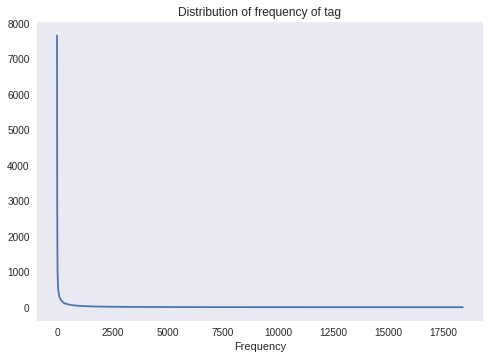

In [30]:
plt.plot(tag_counts)
plt.grid()
plt.xlabel('Tag number')
plt.xlabel('Frequency')
plt.title("Distribution of frequency of tag")
plt.show()

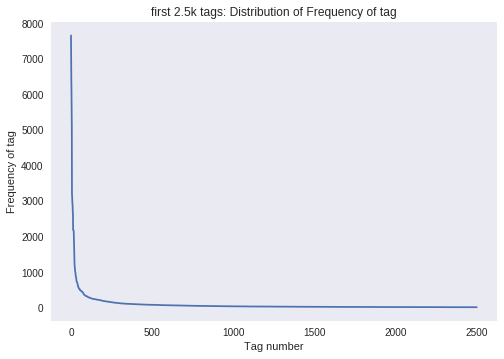

In [31]:
plt.plot(tag_counts[0:2500])
plt.title('first 2.5k tags: Distribution of Frequency of tag')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Frequency of tag")
plt.show()


In [32]:
print(len(tag_counts[0:2500:10]),tag_counts[0:2500:10])

250 [7663 2879 1597  868  667  528  482  444  370  334  316  289  272  255
  246  239  227  220  213  201  190  181  174  169  161  153  148  141
  136  131  126  122  117  114  111  109  107  105  103  101   98   97
   94   92   90   88   87   85   83   82   81   80   79   78   77   75
   74   72   70   70   69   68   66   65   64   64   63   62   61   60
   60   59   57   57   55   55   54   53   52   51   51   50   49   49
   49   48   47   47   46   45   44   44   43   42   42   42   41   40
   40   39   39   38   38   38   37   37   36   36   36   35   35   35
   35   34   34   34   33   33   33   33   33   32   32   32   31   31
   31   30   30   30   30   29   29   29   29   28   28   28   28   27
   27   27   27   27   26   26   26   26   26   25   25   25   25   25
   25   24   24   24   24   24   23   23   23   23   23   23   23   22
   22   22   22   22   22   22   21   21   21   21   21   21   21   21
   20   20   20   20   20   20   20   19   19   19   19   19   19   19
  

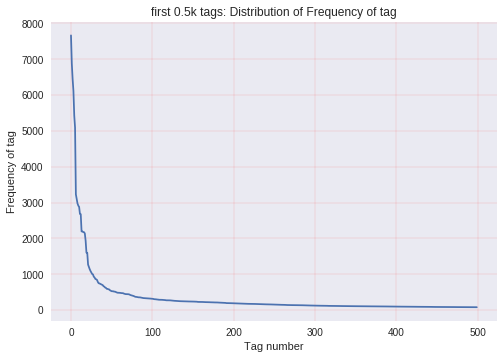

In [33]:
plt.plot(tag_counts[0:500])
plt.title('first 0.5k tags: Distribution of Frequency of tag')
plt.xlabel("Tag number")
plt.ylabel("Frequency of tag")
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.show()

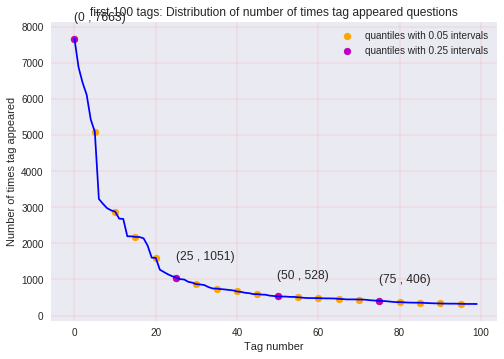

20 [7663 5091 2879 2177 1597 1051  868  744  667  592  528  506  482  461
  444  406  370  355  334  325]


In [34]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid(color='r', linestyle='-', linewidth=0.1)
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [0]:
#Store tags whose frequency is greater than 1000
list_of_tags_gt_1k=[]
for i in range(tag_df_sorted.shape[0]):
  if(tag_df_sorted.iloc[i].Counts >1000):
    list_of_tags_gt_1k.append(tag_df_sorted.iloc[i].Tags)

In [36]:
len(list_of_tags_gt_1k)

27

In [37]:
print("tag = ",list_of_tags_gt_1k[0]," has max Frequency= ",tag_counts[0])

tag =  c#  has max Frequency=  7663


**Observation:**
1. tag 'C# ' has max frequency 7663
2. 27 tag is tagged in more than 1000 question.
3. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

**3.2.4 Tags Per Question**

In [0]:
#Storing tag_counts in a list
tag_cnt_que=tag_train_bows.sum(axis=1).tolist()

## 'tag_count_que' is list of list 
tag_count_que=[]
for li in tag_cnt_que:
  for x in li:
    tag_count_que.append(int(x))

In [39]:
print( "Maximum number of tags per question: %d"%max(tag_count_que))
print( "Minimum number of tags per question: %d"%min(tag_count_que))
print( "Avg. number of tags per question: %f"% ((sum(tag_count_que)*1.0)/len(tag_count_que)))

Maximum number of tags per question: 5
Minimum number of tags per question: 1
Avg. number of tags per question: 2.885444


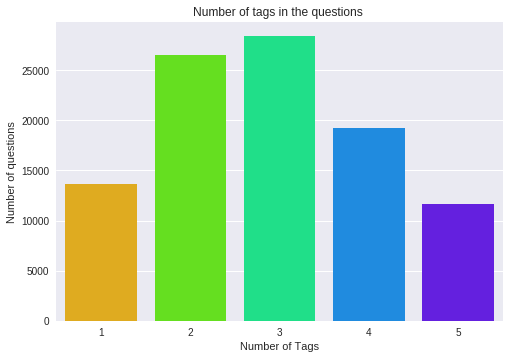

In [40]:
sns.countplot(tag_count_que,palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

#Note:- 'countplot' is used to plot categorical data
#Note:- palette='gist_rainbow' result in very good color effect

**3.2.5 Most Frequent Tags**

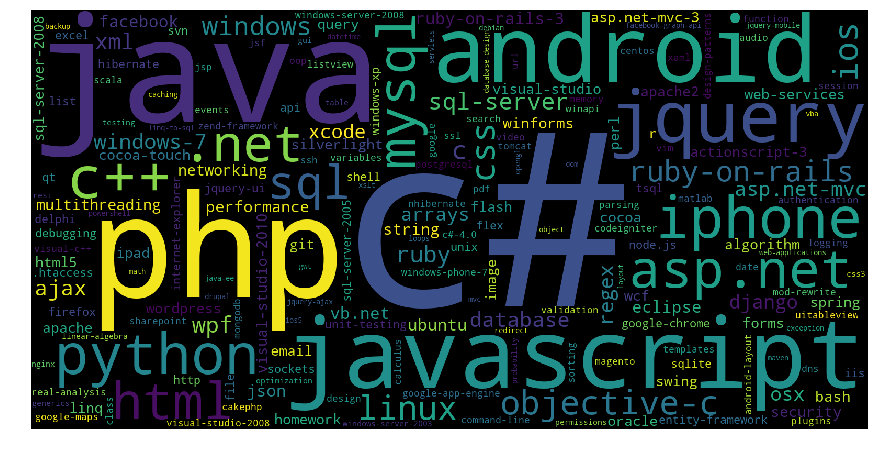

In [41]:
wordcloud=WordCloud(background_color='black',width=1600,height=800).generate_from_frequencies(result)
fig=plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("tag.png")
plt.show()

**Observations:**

A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

In [0]:
#Download image
from google.colab import files
files.download('tag.png')

**3.2.6 The top 20 tags**

In [0]:
tag_df_sorted.head(20)
top_20_tags=list(tag_df_sorted['Tags'][0:20])
top_20_freq=list(tag_df_sorted['Counts'][0:20])


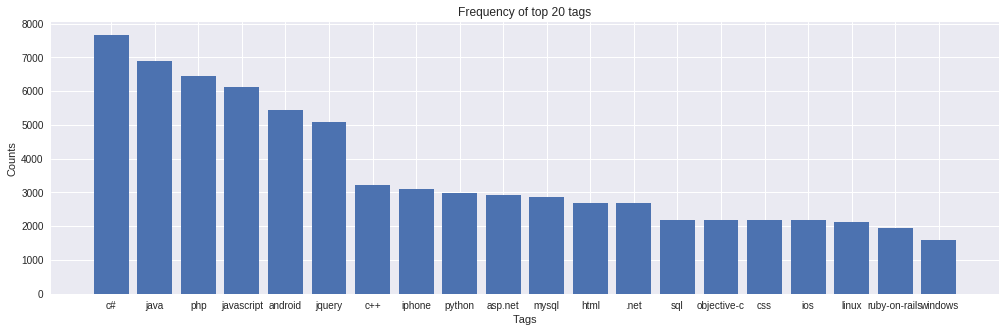

In [44]:
fig=plt.figure(figsize=(17,5))
plt.title('Frequency of top 20 tags')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.bar(top_20_tags,top_20_freq)
plt.show()


**Observations:**

1.Majority of the most frequent tags are programming language.

2.C# is the top most frequent programming language.

3.Android, IOS, Linux and windows are among the top most frequent operating systems.

# 3.3 Cleaning and preprocessing of Questions

**3.3.1 Preprocessing**

1.Sample 100k data points(Already done)

2.Separate out code-snippets from Body

3.Remove Spcial characters from Question title and description (not in code)

4.Remove stop words (Except 'C')

5.Remove HTML Tags

6.Convert all the characters into small letters

7.Use SnowballStemmer to stem the words

In [0]:
from bs4 import BeautifulSoup
def removehtml(data):
  clean_text=BeautifulSoup(data,'lxml').text
  return clean_text

In [46]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
#Not implementin Snowball Stemmer as datasize is less

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def create_connection(db_file):
  try:
    conn=sqlite3.connect(db_file)
    return conn
  except Error as e:
    print(e)
  return None

In [0]:
def create_table(conn,query):
  try:
    c=conn.cursor()
    c.execute(query)
  except Error as e:
    print(e)
  return None

In [0]:
def checkTableExists(conn):
  cursr=conn.cursor()
  query="SELECT name FROM sqlite_master WHERE TYPE='table' "
  table_names=cursr.execute(query)
  print("Tables in the database: ")
  tables=table_names.fetchall()
  print(tables[0][0])
  return(len(tables))

In [0]:
def create_database_table(database,query):
  conn=create_connection(database)
  if conn is not None:
    create_table(conn,query)
    checkTableExists(conn)
  else:
    print("Error!database is not created")
  conn.close()

In [51]:
query = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed.db",query)

Tables in the database: 
QuestionsProcessed


In [52]:
read_db = 'database_final.db'
write_db = 'Processed.db'
if os.path.isfile(read_db):
  conn_read=create_connection(read_db)
  if conn_read is not None:
    reader=conn_read.cursor()
    query="SELECT Title,Body,Tags FROM DTable"
    reader.execute(query)
else:
  print("None")
if os.path.isfile(write_db):
  conn_w=create_connection(write_db)
  if conn_w is not None:
    tables=checkTableExists(conn_w)
    writer=conn_w.cursor()
    if tables !=0:
      writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
      print("Cleared All the ROWS")

Tables in the database: 
QuestionsProcessed
Cleared All the ROWS


**we create a new data base to store preprocessed questions**

In [53]:
import re
from bs4 import BeautifulSoup
stemmer = SnowballStemmer("english")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [54]:
start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0

for row in reader :
  is_code=0
  title,question,tags=row[0],row[1],str(row[2])
  if '<code>' in question:
    questions_with_code+=1
    is_code = 1
  x = len(question)+len(title)
  len_pre+=x
  code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
  question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
  question=removehtml(question.encode('utf-8'))
  title=title.encode('utf-8')
  question=str(title)+" "+str(title)+" "+str(title)+" "+question
  question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
  words=word_tokenize(str(question.lower()))
  #Removing all single letter and and stopwords from question exceptt for the letter 'c'
  question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop and (len(j)!=1 or j=='c'))
  len_post+=len(question)
  tup = (question,code,tags,x,len(question),is_code)
  questions_proccesed += 1
  writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
  if (questions_proccesed%100000==0):
    print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)


Avg. length of questions(Title+Body) before processing: 1149
Avg. length of questions(Title+Body) after processing: 406
Percent of questions containing code: 56
Time taken to run this cell : 0:05:09.526810


In [0]:
# dont forget to close the connections, or else you will end up with locks
conn_read.commit()
conn_w.commit()
conn_read.close()
conn_w.close()

In [56]:
if os.path.isfile(write_db):
  conn_read=create_connection(write_db)
  if conn_read is not None:
    reader=conn_read.cursor()
    reader.execute("SELECT question FROM QuestionsProcessed LIMIT 10")
    print("Questions after Preprocessed")
    print("="*100)
    reader.fetchone()
    for row in reader :
      print(row)
      print('-'*100)
conn_read.commit()
conn_read.close()

Questions after Preprocessed
('count invers document frequenc idf everi document count invers document frequenc idf everi document count invers document frequenc idf everi document wan na count idf formula total data mani data contain search word tabl 1. code function countndw work well especi call databas need count everi defin code pleas help me.. thank much',)
----------------------------------------------------------------------------------------------------
('frameview flip anim imag scale frameview flip anim imag scale frameview flip anim imag scale seem work got wrong ... got card game build flip turn card text view display inform follow main.xml layout also follow two xml file hold card imag pre post flip within frameview per http www.inter-fuser.com 2009 08 android-animations-3d-flip.html first card.xm land second card.xml ident save id valu problem imag file use 350 pixel tall despit use main scale fit screen tri use valu everi place think work besid want put hard code pixel 

In [0]:
write_db="Processed.db"
if os.path.isfile(write_db):
  conn_read=create_connection(write_db)
  if conn_read is not None:
    preprocessed_data=pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_read)
else:
  print("No write_db file")
conn_read.commit()
conn_read.close()

In [58]:
preprocessed_data.head()

,question,tags
0,control lego wedo devic control lego wedo devi...,c# api lego
1,count invers document frequenc idf everi docum...,php
2,frameview flip anim imag scale frameview flip ...,android image layout resize scaling
3,go java classic asp vb go java classic asp vb ...,vb6 career-development legacy-code
4,insert custom field typo3 dam modul custom loc...,typo3 dam


In [59]:
print("number of data points  :", preprocessed_data.shape[0])
print("number of features :", preprocessed_data.shape[1])

number of data points  : 99461
number of features : 2


# 4. Machine Learning Models
# 4.1 Converting tags for multilabel problems



In [0]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

In [61]:
print(preprocessed_data.shape)
print(multilabel_y.shape)

(99461, 2)
(99461, 18364)


In [62]:
print("Total no of tags= ",multilabel_y.shape[1])
print("Total no of questions= ",preprocessed_data.shape[0])

Total no of tags=  18364
Total no of questions=  99461


**Selecting Most Frequent 500 Tags**

In [0]:
def tags_to_choose(n):
  t=multilabel_y.sum(axis=0).tolist()[0]
  sorted_tags_i=sorted(range(len(t)),key=lambda i:t[i],reverse=True)
  multiple_yn=multilabel_y[:,sorted_tags_i[:n]]  
  #matrix having all row contain the 0 or 1 values for n frequent tags as column
  return multiple_yn
def questions_explained_fn(n):
  multiple_yn=tags_to_choose(n)
  x=multiple_yn.sum(axis=1)
  y=np.count_nonzero(x) 
  #y= no_of_que_containing_atleast_one_freq_tag
  return y

In [0]:
questions_explained=[]
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500,total_tags,100):
  questions_explained.append(np.round(((questions_explained_fn(i)/total_qs)*100),3))

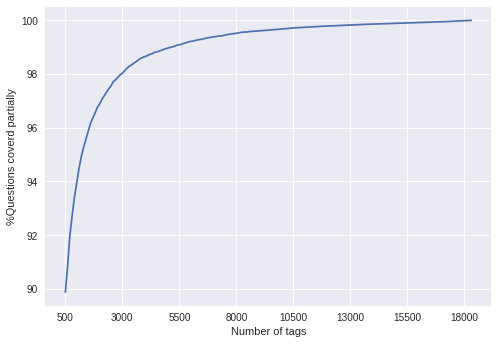

In [65]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("%Questions coverd partially")
plt.show()

**Observation:**

1.with 5500 tags we are covering 99.9% questions_explained

2.with 500 tags we are covering 90% questions_explained


In [66]:
# we will be taking 500 tags
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 89393 out of  99461


In [75]:
preprocessed_data.shape

(99461, 2)

In [0]:
x_train=preprocessed_data[0:79568]
x_test=preprocessed_data[79568:99461]
y_train=multilabel_yx[0:79568,:]
y_test=multilabel_yx[79568:99461,:]

In [77]:
#x_test=preprocessed_data[80000:100000]
x_test.shape

(19893, 2)

In [79]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79568, 2)
(19893, 2)
(79568, 500)
(19893, 500)


# 4.5.2 Featurizing data with BOWs

In [80]:
preprocessed_data['question'].head()

0    control lego wedo devic control lego wedo devi...
1    count invers document frequenc idf everi docum...
2    frameview flip anim imag scale frameview flip ...
3    go java classic asp vb go java classic asp vb ...
4    insert custom field typo3 dam modul custom loc...
Name: question, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [121]:
start = datetime.now()
count_vector=CountVectorizer(min_df=0.00009,tokenizer = lambda x: x.split(),ngram_range=(1,4))
count_vector.fit(x_train['question'])
train_bows=count_vector.transform(x_train['question'])
test_bows=count_vector.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:02:03.740581


In [122]:
print("Shape of Train Data X: ",train_bows.shape," Y: ",y_train.shape)
print("Shape of Test Data X: ",test_bows.shape," Y: ",y_test.shape)

Shape of Train Data X:  (79568, 89272)  Y:  (79568, 500)
Shape of Test Data X:  (19893, 89272)  Y:  (19893, 500)


# Q-3 Applying Logistic Regression with OneVsRest Classifier

In [92]:
clf=OneVsRestClassifier(SGDClassifier(loss='hinge',alpha=0.00001,penalty='l1'),n_jobs=-1)
clf.fit(train_bows,y_train)
y_pred=clf.predict(test_bows)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.12155029407329211


In [93]:
print("Hemming :",metrics.hamming_loss(y_test,y_pred))
precision=precision_score(y_test,y_pred,average='micro')
recall=recall_score(y_test,y_pred,average='micro')
f1=f1_score(y_test,y_pred,average='micro')
print("Micro-average quality numbers")
print("Precision: %.4f" %precision," Recall: %.4f" %recall," F1_score: %.4f" %f1)
print (metrics.classification_report(y_test, y_pred))

Accuracy : 0.005860352887950535
Micro-average quality numbers
Precision: 0.2993  Recall: 0.4793  F1_score: 0.3685
              precision    recall  f1-score   support

           0       0.41      0.47      0.44      1209
           1       0.53      0.53      0.53      1272
           2       0.59      0.65      0.62      1529
           3       0.50      0.52      0.51      1505
           4       0.75      0.79      0.77      1027
           5       0.75      0.77      0.76      1809
           6       0.58      0.58      0.58       751
           7       0.56      0.62      0.59       851
           8       0.62      0.69      0.65       657
           9       0.42      0.59      0.49       524
          10       0.59      0.69      0.63       582
          11       0.25      0.28      0.27       655
          12       0.16      0.24      0.19       390
          13       0.34      0.46      0.39       356
          14       0.31      0.39      0.35       489
          15       0.

# Q-1:Logistic regression(OvR)

In [94]:
clf=OneVsRestClassifier(LogisticRegression(penalty='l1'),n_jobs=-1)
clf.fit(train_bows,y_train)
y_pred=clf.predict(test_bows)
print("Accuracy :",metrics.accuracy_score(y_test,y_pred))
print("Hemming :",metrics.hamming_loss(y_test,y_pred))
precision=precision_score(y_test,y_pred,average='micro')
recall=recall_score(y_test,y_pred,average='micro')
f1=f1_score(y_test,y_pred,average='micro')
print("Micro-average quality numbers")
print("Precision: %.4f" %precision," Recall: %.4f" %recall," F1_score: %.4f" %f1)
print (metrics.classification_report(y_test, y_pred))

Accuracy : 0.2146483687729352
Hemming : 0.0030621826773236816
Micro-average quality numbers
Precision: 0.5978  Recall: 0.4333  F1_score: 0.5024
              precision    recall  f1-score   support

           0       0.51      0.39      0.45      1209
           1       0.67      0.48      0.56      1272
           2       0.75      0.59      0.66      1529
           3       0.58      0.47      0.52      1505
           4       0.90      0.75      0.82      1027
           5       0.85      0.76      0.81      1809
           6       0.77      0.55      0.64       751
           7       0.67      0.61      0.64       851
           8       0.84      0.63      0.72       657
           9       0.69      0.51      0.59       524
          10       0.83      0.66      0.73       582
          11       0.35      0.23      0.28       655
          12       0.34      0.17      0.23       390
          13       0.50      0.35      0.41       356
          14       0.35      0.27      0.30  

# Q-2:HyperParameter Tunning using GrideSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'estimator__C': [1, 10] }

In [0]:
clf1= OneVsRestClassifier(LogisticRegression(penalty='l1'),n_jobs=-1)
clf = GridSearchCV(clf1,param_grid=parameters, n_jobs=-1)


In [132]:
clf.fit(train_bows,y_train)

ValueError: ignored

In [0]:
print('Best score:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 